In [349]:
value_sizes=[64]
client_numbers=[4, 8, 16, 32]
repetitions=2
memtier_instances=3
experiments=len(value_sizes) * len(client_numbers) * repetitions
ex=35

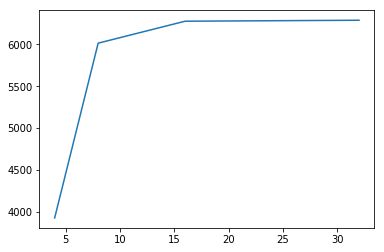

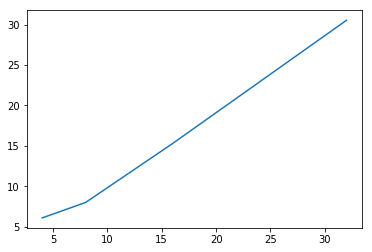

[6.1051666666666673, 8.016, 15.300166666666666, 30.532833333333333]


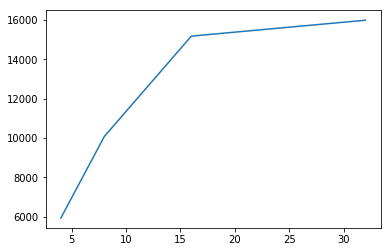

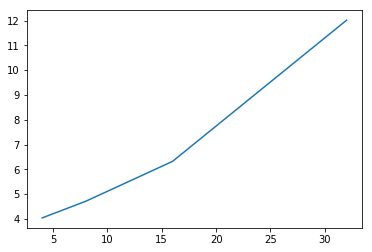

[4.0410000000000004, 4.7108333333333334, 6.3220000000000001, 12.0105]


In [525]:
value_sizes=[64]
client_numbers=[4, 8, 16, 32]
repetitions=2
memtier_instances=3
worker_threads=[8, 32]
experiments=len(value_sizes) * len(client_numbers) * repetitions * len(worker_threads)
ex=36


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean 
import re
import numpy as np


clients_data = []
rearranged_client_data=[]

for i in range(memtier_instances):
    client = []
    initial = open("/home/skotti/data_from_cloud/experiment_"+str(ex)+"/client"+str(i+1)+".log","r")
    lines = initial.readlines()
    for line in lines:
        if line.startswith("Gets"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            parts = [parts[1], parts[4]]
            client.append(parts)
    initial.close()
    clients_data.append(client)

for ex in range(experiments):
    rearranged = []
    for client in clients_data:
        rearranged.append(client[ex])
    rearranged_client_data.append(rearranged)
    
data_array = np.array(rearranged_client_data)
float_data_array = data_array.astype(np.float)
df_experiments = []
for i in range(experiments):
    df_experiments.append(pd.DataFrame(data=float_data_array[i], columns=range(2)))

index = range(len(value_sizes)*len(client_numbers)*repetitions*memtier_instances)
global_data = pd.DataFrame(columns=['Worker threads','Value size', 'Client number', 'Repetition', 'Memtier instance', 'TR', 'RT'])

j = 0
k = 0
for w in worker_threads:
    for value_size in value_sizes:
        for n in client_numbers:
            for rep in range(repetitions):
                for memtier in range(memtier_instances):
                    d = [w, value_size, n, rep, memtier, df_experiments[k].iloc[memtier, 0], df_experiments[k].iloc[memtier, 1]]
                    global_data.loc[j] = d
                    j += 1
                k += 1

TR_graph = []
X_axis = client_numbers
for w in workers:
    for value_size in value_sizes:
        TR = []
        RT = []
        for client_number in client_numbers:
            subset = global_data[(global_data['Worker threads'] == value_size) & 
                                 (global_data['Value size'] == value_size) & 
                                 (global_data['Client number'] == client_number)]
            groupped = subset.groupby(['Repetition']).sum()
            TR.append(groupped.mean()['TR'])
            groupped1 = subset.groupby(['Repetition']).mean()
            RT.append(groupped1.mean()['RT'])
        plt.plot(X_axis, TR)
        plt.show()
        plt.plot(X_axis, RT)
        plt.show()
        print(RT)

In [547]:
ex=38
mw_log = open("/home/skotti/data_from_cloud/experiment_"+str(ex)+"/mw.log","r")
lines = mw_log.readlines()

new_experiment_positions=[]
invalidated_experiments=[]
for i in range(len(lines)):
    parts = lines[i].split(" ")
    if lines[i][]
    if lines[i] == "DEBUG ethz.Middleware: [MIDDLEWARE] EXPERIMENT STARTED\n":
        new_experiment_positions.append(i)
print(new_experiment_positions)
for i in range(len(new_experiment_positions) - 1):
    for j in range(new_experiment_positions[i], new_experiment_positions[i+1]):
        if lines[j].startswith("ERROR"):
            print("Error in line="+str(j))
            print("Invalidate experiment="+str(i))
            invalidated_experiments.append(i)
        elif lines[j].startswith("SIGTERM"):
            print("Sigterm reported in "+ str(i)+".Check the data")
#check last block
for j in range(new_experiment_positions[len(new_experiment_positions) - 1], len(lines)):
    if lines[j].startswith("ERROR"):
            print("Error in line="+str(j))
            print("Invalidate experiment="+str(len(new_experiment_positions) - 1))
            invalidated_experiments.append(len(new_experiment_positions) - 1)
    elif lines[j].startswith("SIGTERM"):
        print("Sigterm reported in "+ str(len(new_experiment_positions) - 1)+".Check the data")
            
for i in range(len(new_experiment_positions) - 1):
    if i not in invalidated_experiments:
        f = open("/home/skotti/data_from_cloud/experiment_"+str(ex)+"/log_"+str(i)+".log", "w")
        for j in range(new_experiment_positions[i], new_experiment_positions[i+1]):
            if (lines[j][0].isdigit()):
                f.write(lines[j])
        f.close()
        
f = open("/home/skotti/data_from_cloud/experiment_"+str(ex)+"/log_"+str(len(new_experiment_positions) - 1)+".log", "w")
for j in range(new_experiment_positions[len(new_experiment_positions) - 1], len(lines)):
    if (lines[j][0].isdigit()):
        f.write(lines[j])
f.close()

[6, 73, 140, 234, 325, 464, 603, 838, 1087, 1182, 1277, 1401, 1520, 1687, 1854, 2117]
Sigterm reported in 7.Check the data
Sigterm reported in 15.Check the data


492.33671875
748.08125
782.750091912
783.672794118


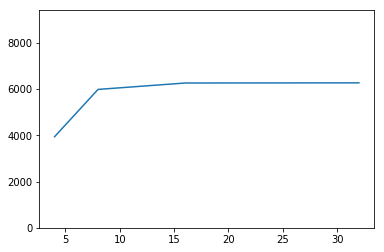

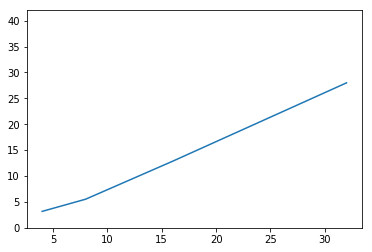

Throughput numbers
[3938.6937499999999, 5984.6499999999996, 6262.0007352941175, 6269.3823529411757]
Response time numbers
[3.1719732589008731, 5.5240688678535923, 12.85364374548322, 27.992315315707287]
Queue time numbers
[1.6763854133112026, 4.211507774055292, 11.576117303552781, 26.717259116377331]
Service time numbers
[1.3817049116855049, 1.2449245152180997, 1.2277212568127085, 1.2331510783019826]
Queue size numbers
[9.6770185546921486, 24.800481231149693, 71.375579068104798, 166.41347720361802]
Process time numbers
[1.4955878455896703, 1.3125610937983008, 1.2775264419304402, 1.275056199329959]


185.651953125
317.8375
474.032823989
499.641819853


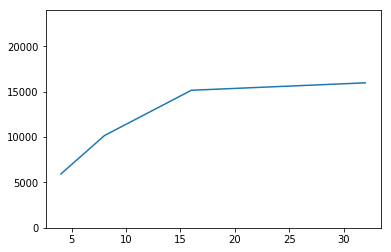

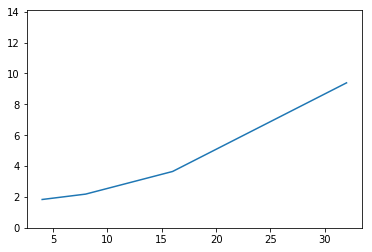

Throughput numbers
[5940.8624999999993, 10170.799999999999, 15169.050367647058, 15988.53823529412]
Response time numbers
[1.8345105613873405, 2.1832845007275727, 3.6506375360141026, 9.3934048722204881]
Queue time numbers
[0.24830990449619059, 0.56609423545837101, 1.9868737062192174, 7.3991298279556608]
Service time numbers
[1.4972341978963493, 1.5523778857120385, 1.6100592167534549, 1.9474151652383023]
Queue size numbers
[5.7129330968356866, 12.393350940928935, 38.302000248517786, 110.71456378248125]
Process time numbers
[1.5862006568911502, 1.6171902652692018, 1.6637638297948849, 1.9942750442648285]




In [550]:
value_sizes = [64]
client_numbers = [4, 8, 16, 32]
workers = [8, 32]
repetitions = 2
memtier_instances = 3
nServers = 1
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions
ex = 36


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean 

data=[]
k = 0
for w in workers:
    for i in range(len(value_sizes) * len(client_numbers) * repetitions):
        data.append(pd.read_csv("/home/skotti/data_from_cloud/experiment_"+str(ex)+"/log_"+str(k)+".log", header=None, delimiter=' '))
        #print(data[i])
        #data[k] = data[k].drop(data[k].columns[10], axis=1)
        for j in range (w):
            d = data[k].index[data[k][0] == j].tolist()
            data[k] = data[k].drop([d[0], d[1], d[2]])
            data[k] = data[k].drop([d[len(d)-1], d[len(d)-2], d[len(d)-3]])
        k += 1
        
global_data = pd.DataFrame(columns=['Worker threads',
                                    'Value size',
                                    'Client number',
                                    'Repetition',
                                    'Worker thread',
                                    'Time1',
                                    'Time2',
                                    'Time3',
                                    'Time4',
                                    'Time5',
                                    'Queue size',
                                    'Left queue',
                                    'Successful',
                                    'Per server1',
                                    'Per server2',
                                    'Per server3',
                                    'Duration'])

k = 0
m = 0
for w in workers:
    for value_size in value_sizes:
        for n in client_numbers:
            for rep in range(repetitions):
                for d in range (len(data[m])):
                    if nServers == 1:
                        newline = [w, value_size, n, rep, 
                             data[m].iloc[d, 0], 
                             data[m].iloc[d, 1],
                             data[m].iloc[d, 2], 
                             data[m].iloc[d, 3], 
                             data[m].iloc[d, 4], 
                             data[m].iloc[d, 5],
                             data[m].iloc[d, 6],
                             data[m].iloc[d, 7], 
                             data[m].iloc[d, 8],
                             data[m].iloc[d, 9], 0, 0, 5000]
                    elif nServers == 3:
                        newline = [w, value_size, n, rep, 
                             data[m].iloc[d, 0], 
                             data[m].iloc[d, 1],
                             data[m].iloc[d, 2], 
                             data[m].iloc[d, 3], 
                             data[m].iloc[d, 4], 
                             data[m].iloc[d, 5],
                             data[k].iloc[d, 6],
                             data[m].iloc[d, 7], 
                             data[m].iloc[d, 8], 
                             data[m].iloc[d, 9], 
                             data[m].iloc[d, 10],
                             data[m].iloc[d, 11], 5000]
                    global_data.loc[k] = newline
                    k += 1
                m += 1        

for w in workers:
    for value_size in value_sizes:
        TR=[]
        RT=[]
        QT=[]
        ST=[]
        QS=[]
        TR_per_worker=[]
        PT=[]
        X_axis=client_numbers
        for client_number in client_numbers:
            subset = global_data[(global_data['Worker threads'] == w) &
                                 (global_data['Value size'] == value_size) & 
                                 (global_data['Client number'] == client_number)]
            
            # for graphs
            groupped0 = subset.groupby(['Repetition']).sum()
            groupped1 = groupped0[[ 'Time5', 'Successful']].mean()
            RT.append(groupped1['Time5'] / groupped1['Successful'] / 1000000.0)
            
            groupped2 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            groupped3 = groupped2['Successful'] / groupped2['Duration'] * 1000.0
            TR.append(groupped3.groupby(['Repetition']).sum().mean())
            
            # for formula checks
            # queue average time for all threads
            groupped4 = subset.groupby(['Repetition']).sum()
            groupped5 = groupped4[[ 'Time1', 'Successful']].mean()
            QT.append(groupped5['Time1'] / groupped5['Successful'] / 1000000.0)
            
            # average service time
            groupped6 = subset.groupby(['Repetition']).sum()
            groupped7 = groupped6[['Time3', 'Successful']].mean()
            ST.append(groupped7['Time3'] / groupped7['Successful'] / 1000000.0)
            
            # average process time
            groupped13 = subset.groupby(['Repetition']).sum()
            groupped14 = groupped13[['Time4', 'Successful']].mean()
            PT.append(groupped14['Time4'] / groupped14['Successful'] / 1000000.0)
            
            # average queue size
            groupped8 = subset.groupby(['Repetition']).sum()
            groupped9 = groupped8[['Queue size', 'Successful']].mean()
            QS.append(groupped9['Queue size'] / groupped9['Successful'])
            
            # TR per worker
            groupped10 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            groupped11 = groupped10['Successful'] / groupped10['Duration'] * 1000.0    
            groupped12 = groupped11.groupby(['Repetition']).mean().mean()
            print(groupped12)
            
        plt.plot(X_axis, TR)
        plt.ylim(0, max(TR) + max(TR)/2)
        plt.show()
        plt.plot(X_axis, RT)
        plt.ylim(0, max(RT) + max(RT)/2)
        plt.show()
        print("Throughput numbers")
        print(TR)
        print("Response time numbers")
        print(RT)
        print("Queue time numbers")
        print(QT)
        print("Service time numbers")
        print(ST)
        print("Queue size numbers")
        print(QS)
        print("Process time numbers")
        print(PT)
        print("\n")

In [ ]:
v1 = [6.1051666666666673, 8.016, 15.300166666666666, 30.532833333333333]
v2 = [3.1719732589008731, 5.5240688678535923, 12.85364374548322, 27.992315315707287]


v3 = [1.8345105613873405, 2.1832845007275727, 3.6506375360141026, 9.3934048722204881]
v4 = [4.0410000000000004, 4.7108333333333334, 6.3220000000000001, 12.0105]
print(list(np.array(v1) - np.array(v2)))
print(list(np.array(v4) - np.array(v3)))

In [551]:



'''
for j in range (tn):
            d = data[i].index[data[i][3] == j].tolist()
            data[i] = data[i].drop([d[0], d[1]])
            data[i] = data[i].drop([d[len(d)-1], d[len(d)-2], d[len(d)-3]])
            
        accum_throughput.append(data[i][11].sum()/(5000.0/1000.0))
        accum_rt.append(data[i][8].sum()/data[i][11].sum())
        accum_data8 += data[i][8].sum()
        accum_data11 += data[i][11].sum()
        accum_dataot += 5000 * len(data[i][11])
        
        
        data[i][np + 0] = data[i][4] / data[i][11] / 1000000.0
        data[i][np + 1] = data[i][5] / data[i][11] / 1000000.0
        data[i][np + 2] = data[i][6] / data[i][11] / 1000000.0
        data[i][np + 3] = data[i][7] / data[i][11] / 1000000.0
        data[i][np + 4] = data[i][8] / data[i][11] / 1000000.0
        data[i][np + 5] = data[i][9] / data[i][11]
        data[i][np + 6] = data[i][11] / (data[i][ot] / 1000.0)
        
        

        for j in range(tn):
            data_frames.append(data[i][data[i][3] == j])
        #    data_frames[j] = data_frames[j][2:]
        #    data_frames[j] = data_frames[j][:-2]


        for j in range(tn):
            avg_workers[i] = avg_workers[i].append({0:data_frames[j][4].sum() / data_frames[j][11].sum() / 1000000.0,
                               1:data_frames[j][5].sum() / data_frames[j][11].sum() / 1000000.0,
                               2:data_frames[j][6].sum() / data_frames[j][11].sum() / 1000000.0,
                               3:data_frames[j][7].sum() / data_frames[j][11].sum() / 1000000.0,
                               4:data_frames[j][8].sum() / data_frames[j][11].sum() / 1000000.0, # by now response time
                               5:data_frames[j][9].sum() / data_frames[j][11].sum(),
                               6:data_frames[j][11].sum() / (data_frames[j][ot].sum() / 1000.0),
                               7:data_frames[j][11].sum() / len(data_frames[j][11])}, ignore_index=True)
        data_frames = []
        #collect data from workers in one experiment


    print("rightmean throughput="+str(accum_data11/(accum_dataot/tn/1000.0)))
    print("rightmean rt="+str(accum_data8/accum_data11/1000000.0))
    #print("wrong rt="+str(mean(accum_rt)/1000000))
    #за три эксперимента среднее по worker
    
    avg_across_workers = pd.DataFrame()
    avg_across_workers = avg_workers[0].copy()
    for i in range(1,repetitions):
        avg_across_workers += avg_workers[i].copy()
    avg_across_workers = avg_across_workers / repetitions
    overal_TR_across_workers = avg_across_workers.iloc[:,-1].sum()
    overall_all_data_across_workers = avg_across_workers.iloc[:, :-1].mean()'''

    # for dynamic across experiment use data
    '''
    to_print = data[1][data[1][3] == 0]
    to_print = to_print[2:]
    to_print = to_print[:-2]
    X=range(0, len(to_print) * 5, 5)
    plt.plot(X, to_print[10])
    plt.xticks(X)
    for xc in X:
        plt.axvline(x=xc)
    plt.ylim(0, 30000)
    plt.show()
'''


    # print average for one experiment for all workers (n rows, m tables)
    #print("sum throughputs="+str(avg_workers[0][6].sum()))
    #print average for all experiment for all workers (n rows, one table)
    #print(avg_across_workers)

    #print overall TR in all experiments across all workers (one number)
    #print(overal_TR_across_workers)
    #print("\n")

    #print overall data in all experiments across all workers (one table with one column)
    #print(avg_across_workers.iloc[:, :-1].mean())



IndentationError: unexpected indent (<ipython-input-551-9c82e057fc6e>, line 60)

In [ ]:
df = pd.DataFrame({'BoolCol': [True, False, False, True, True]})
df.index[df['BoolCol'] == True].tolist()

In [127]:
avg_workers = pd.DataFrame()

avg_workers.append({1:1, 2:2, 3:3}, ignore_index=True)


,1,2,3
0,1.0,2.0,3.0


In [28]:
from statistics import mean 

def aggw(data):
    sum = 0
    for k in data.keys():
        sum += data[k]
    return sum

value_size=[64, 256, 512, 1024]
n_clients=[4, 8, 16, 32]
#n_threads=[8, 32, 64]
n_threads=[3, 3, 3]

mw_log = open("/home/skotti/asl-project-2019-ruzhanskaia/mw.log","r")
lines = mw_log.readlines()

i = 0
for vs in value_size: #3
    for wt in n_threads: #4
        for nc in n_clients: #4
            for rp in range(3):
                if lines[i] == "DEBUG ethz.Middleware: [MIDDLEWARE] EXPERIMENT STARTED\n":


i = 0
for vs in value_size: #3
    for worker_threads in n_threads: #4
        for n_clients in n_clients: #4
            avg1 = dict.fromkeys(list(range(worker_threads)), [])
            avg2 = dict.fromkeyskeys(list(range(worker_threads)), [])
            avg3 = dict.fromkeys(list(range(worker_threads)), [])
            avg4 = dict.fromkeys(list(range(worker_threads)), [])
            avg5 = dict.fromkeys(list(range(worker_threads)), [])
            avg6 = dict.fromkeys(list(range(worker_threads)), [])
            avg7 = dict.fromkeys(list(range(worker_threads)), [])
            avg8 = dict.fromkeys(list(range(worker_threads)), [])
            for rep in range(1): #3
                b1 = dict.fromkeys(list(range(worker_threads)), [])
                b2 = dict.fromkeys(list(range(worker_threads)), [])
                b3 = dict.fromkeys(list(range(worker_threads)), [])
                b4 = dict.fromkeys(list(range(worker_threads)), [])
                b5 = dict.fromkeys(list(range(worker_threads)), [])
                b6 = dict.fromkeys(list(range(worker_threads)), [])
                b7 = dict.fromkeys(list(range(worker_threads)), [])

                lsuma1 = dict.fromkeys(list(range(worker_threads)), 0)
                lsuma2 = dict.fromkeys(list(range(worker_threads)), 0)
                lsuma3 = dict.fromkeys(list(range(worker_threads)), 0)
                lsuma4 = dict.fromkeys(list(range(worker_threads)), 0)
                lsuma5 = dict.fromkeys(list(range(worker_threads)), 0)
                lsuma6 = dict.fromkeys(list(range(worker_threads)), 0)
                lsuma7 = dict.fromkeys(list(range(worker_threads)), 0)
                lsuma8 = dict.fromkeys(list(range(worker_threads)), 0)
                while i < len(lines) and (lines[i] != "DEBUG ethz.Middleware: [MIDDLEWARE] EXPERIMENT STARTED\n"):
                    i += 1
                i += 1
                while i < len(lines) and (lines[i].startswith('DEBUG ethz.WorkerThread: d ') or lines[i].startswith('DEBUG ethz.WorkerThread: CACHE MISS')):
                    if lines[i].startswith('DEBUG ethz.WorkerThread: CACHE MISS'):
                        i += 1
                        continue
                    print(lines[i])
                    splits = lines[i].split(" ")
                    wn = int(splits[3])
                    a1 = float(splits[4]) #time in queue
                    a2 = float(splits[5]) #time for parsing and sending
                    a3 = float(splits[6]) #time in server
                    a4 = float(splits[7]) #time to process request ( parse, send and server)
                    a5 = float(splits[8]) #time to wait in queue, parse, send and server
                    a6 = float(splits[9]) #size of queue
                    a7 = float(splits[10]) #requests left queue
                    a8 = float(splits[11]) #successful requests
                    a9 = float(splits[12]) #observation time (in millis)
                    
                    secs = a9/1000.0
                    b1[wn].append(a1/a8/1000000.0) #avg time in queue
                    b2[wn].append(a2/a8/1000000.0) #avg time for parsing and sending
                    b3[wn].append(a3/a8/1000000.0) #avg time in server
                    b4[wn].append(a4/a8/1000000.0) #avg time for only worker processing
                    b5[wn].append(a5/a8/1000000.0) #avg whole time
                    b6[wn].append(a6/a8) #avg queue size
                    b7[wn].append(a8/secs) #throughput

                    lsuma1[wn] += a1 #time in queue
                    lsuma2[wn] += a2 #time for parsing and sending
                    lsuma3[wn] += a3 #time in server
                    lsuma4[wn] += a4 #time to process request ( parse, send and server)
                    lsuma5[wn] += a5 #time to wait in queue, parse, send and server
                    lsuma6[wn] += a6 #size of queue
                    lsuma7[wn] += a8 #successful requests
                    lsuma8[wn] += a9 #observation time (in millis)
                    i += 1

                #debug_stat_write.write("#VS="+str(vs)+"\n")
                #debug_stat_write.write("#NC="+str(n_clients)+"\n")
                #debug_stat_write.write("#WT="+str(worker_threads)+"\n")
                #debug_stat_write.write("#RN="+str(rep))
                #debug_stat_write.write("#5s AVG")
                # print 5s aggregated values
                print('here')
                for m in range(worker_threads):
                    #print(" ".join(["%.2f" % x for x in b1[m]]))
                    #print(" ".join(["%.2f" % x for x in b2[m]]))
                    #print(" ".join(["%.2f" % x for x in b3[m]]))
                    #print(" ".join(["%.2f" % x for x in b4[m]]))
                    #print(" ".join(["%.2f" % x for x in b5[m]]))
                    #print(" ".join(["%.2f" % x for x in b6[m]]))
                    print(" ".join(["%.2f" % x for x in b7[m]]))
                    #print across one try aggregated values
                    #debug_stat_write.write("#ONERUN AVG")
                    #secs = lsuma8[m]/1000.0
                    #debug_stat_write.write("%0.2f " % (lsuma1[m]/lsuma7[m]/1000000.0))
                    #debug_stat_write.write("%0.2f " % (lsuma2[m]/lsuma7[m]/1000000.0))
                    #debug_stat_write.write("%0.2f " % (lsuma3[m]/lsuma7[m]/1000000.0))
                    #debug_stat_write.write("%0.2f " % (lsuma4[m]/lsuma7[m]/1000000.0))
                    #debug_stat_write.write("%0.2f " % (lsuma5[m]/lsuma7[m]/1000000.0))
                    #debug_stat_write.write("%0.2f " % (lsuma6[m]/lsuma7[m]))
                    #debug_stat_write.write("%0.2f " % (lsuma7[m]/secs))

                    secs = lsuma8[m]/1000.0
                    print("lsum="+str(lsuma7[m]))
                    avg1[wn].append(lsuma1[m]/lsuma7[m]/1000000.0)
                    avg2[wn].append(lsuma2[m]/lsuma7[m]/1000000.0)
                    avg3[wn].append(lsuma3[m]/lsuma7[m]/1000000.0)
                    avg4[wn].append(lsuma4[m]/lsuma7[m]/1000000.0)
                    avg5[wn].append(lsuma5[m]/lsuma7[m]/1000000.0)
                    avg6[wn].append(lsuma6[m]/lsuma7[m]/1000000.0)
                    avg7[wn].append(lsuma7[m]/secs)
                    
            for m in range(worker_threads):
                official_stat_write.write("%0.2f " % mean(avg1[m]))
                print("%0.2f " % mean(avg1[m]))
                official_stat_write.write("%0.2f " % mean(avg2[m]))
                print("%0.2f " % mean(avg2[m]))
                official_stat_write.write("%0.2f " % mean(avg3[m]))
                print("%0.2f " % mean(avg3[m]))
                official_stat_write.write("%0.2f " % mean(avg4[m]))
                print("%0.2f " % mean(avg4[m]))
                official_stat_write.write("%0.2f " % mean(avg5[m]))
                print("%0.2f " % mean(avg5[m]))
                official_stat_write.write("%0.2f " % mean(avg6[m]))
                print("%0.2f " % mean(avg6[m]))
                official_stat_write.write("%0.2f " % mean(avg7[m]))
                print("%0.2f " % mean(avg7[m]))
mw_log.close()

DEBUG ethz.WorkerThread: d 1 0 0 5000000 5000000 5000000 0 1 1 65278

DEBUG ethz.WorkerThread: d 0 0 15000000 8000000 23000000 23000000 0 1 1 65278

DEBUG ethz.WorkerThread: d 2 4000000 1000000 1000000 2000000 6000000 1 1 1 65287

DEBUG ethz.WorkerThread: d 1 1367000000 203000000 3596000000 3799000000 5166000000 2316 9793 9793 5001

DEBUG ethz.WorkerThread: d 0 1274000000 219000000 3571000000 3790000000 5064000000 2215 10050 10050 5002

DEBUG ethz.WorkerThread: d 2 1206000000 197000000 3627000000 3824000000 5030000000 2134 9457 9457 5001

DEBUG ethz.WorkerThread: d 0 1371000000 233000000 3852000000 4085000000 5456000000 2562 12671 12671 5001

DEBUG ethz.WorkerThread: d 1 1352000000 246000000 3851000000 4097000000 5449000000 2369 12714 12714 5003

DEBUG ethz.WorkerThread: d 2 1253000000 208000000 3814000000 4022000000 5275000000 2465 12375 12375 5001

DEBUG ethz.WorkerThread: d 0 1209000000 143000000 3834000000 3977000000 5186000000 1722 10547 10547 5001

DEBUG ethz.WorkerThread: d 1 12

ZeroDivisionError: division by zero

In [13]:
join([12.5, 13.7])

NameError: name 'join' is not defined

In [122]:
l=[4.5,5.2,6.3]
" ".join(["%.2f" % x for x in l])
#", ".join()

'4.50 5.20 6.30'

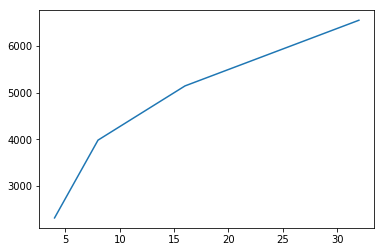

In [92]:
plt.plot([4, 8, 16, 32], [2320, 3983, 5142, 6546])
plt.show()

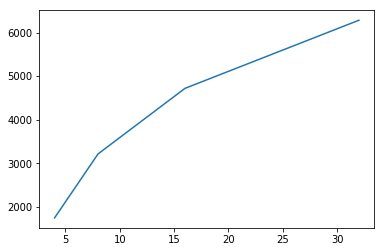

In [93]:
plt.plot([4, 8, 16, 32], [1743, 3212, 4718, 6282])
plt.show()

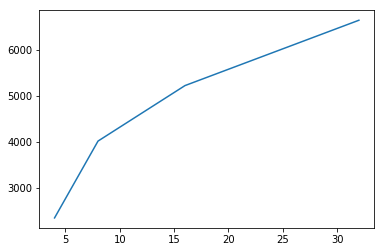

In [94]:
plt.plot([4, 8, 16, 32], [2345, 4015, 5221, 6641])
plt.show()

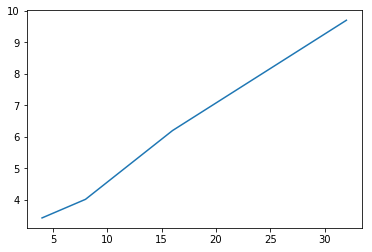

In [95]:
plt.plot([4, 8, 16, 32], [3.43, 4.02, 6.2, 9.7])
plt.show()

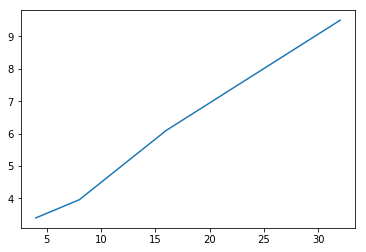

In [96]:
plt.plot([4, 8, 16, 32], [3.4, 3.96, 6.1, 9.5])
plt.show()

In [ ]:
#parse client files
